In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("EXPLORATION DES DONNÉES RÉGIONALES SURSAUD")
print("=" * 55)

🗺️ EXPLORATION DES DONNÉES RÉGIONALES SURSAUD


In [5]:
# Cell 1: Chargement des données
print("Chargement des données régionales...")

df = pd.read_csv("../../data/cleaned/sursaud_regional_cleaned.csv")
df['date_debut_semaine'] = pd.to_datetime(df['date_debut_semaine'])

print(f" Données chargées : {df.shape}")
print(f" Période : {df['date_debut_semaine'].min()} à {df['date_debut_semaine'].max()}")

Chargement des données régionales...
 Données chargées : (27180, 13)
 Période : 2019-12-30 00:00:00 à 2025-10-06 00:00:00


In [6]:
# Cell 2: Vue d'ensemble des données
print("\n📊 VUE D'ENSEMBLE")
print("=" * 25)

print(f"📊 Dimensions : {df.shape[0]:,} observations × {df.shape[1]} colonnes")
print(f"🗺️ Régions : {df['region'].nunique()}")
print(f"👥 Classes d'âge : {df['classe_age'].nunique()}")
print(f"📅 Années : {df['annee'].min()} - {df['annee'].max()}")

print(f"\n👥 Classes d'âge disponibles :")
for age in sorted(df['classe_age'].unique()):
    count = len(df[df['classe_age'] == age])
    print(f"   - {age}: {count:,} observations")

print(f"\n🗺️ Régions disponibles :")
for region in sorted(df['region'].unique()):
    count = len(df[df['region'] == region])
    print(f"   - {region}: {count:,} observations")


📊 VUE D'ENSEMBLE
📊 Dimensions : 27,180 observations × 13 colonnes
🗺️ Régions : 18
👥 Classes d'âge : 5
📅 Années : 2019 - 2025

👥 Classes d'âge disponibles :
   - 00-04 ans: 5,436 observations
   - 05-14 ans: 5,436 observations
   - 15-64 ans: 5,436 observations
   - 65 ans ou plus: 5,436 observations
   - Tous âges: 5,436 observations

🗺️ Régions disponibles :
   - Auvergne et Rhône-Alpes: 1,510 observations
   - Bourgogne et Franche-Comté: 1,510 observations
   - Bretagne: 1,510 observations
   - Centre-Val de Loire: 1,510 observations
   - Corse: 1,510 observations
   - Grand Est: 1,510 observations
   - Guadeloupe: 1,510 observations
   - Guyane: 1,510 observations
   - Hauts-de-France: 1,510 observations
   - Martinique: 1,510 observations
   - Mayotte: 1,510 observations
   - Normandie: 1,510 observations
   - Nouvelle Aquitaine: 1,510 observations
   - Occitanie: 1,510 observations
   - Pays de la Loire: 1,510 observations
   - Provence-Alpes-Côte d'Azur: 1,510 observations
   - 


🔍 ANALYSE DES VALEURS MANQUANTES
Valeurs manquantes par colonne :
   ✅ date_debut_semaine: Aucune valeur manquante
   ✅ semaine: Aucune valeur manquante
   ✅ code_region: Aucune valeur manquante
   ✅ region: Aucune valeur manquante
   ✅ classe_age: Aucune valeur manquante
   ⚠️ taux_urgences_grippe: 890 (3.3%)
   ⚠️ taux_hospitalisations_grippe: 897 (3.3%)
   ✅ taux_sos_medecins_grippe: Aucune valeur manquante
   ✅ annee: Aucune valeur manquante
   ✅ mois: Aucune valeur manquante
   ✅ semaine_annee: Aucune valeur manquante
   ✅ jour_semaine: Aucune valeur manquante
   ✅ trimestre: Aucune valeur manquante


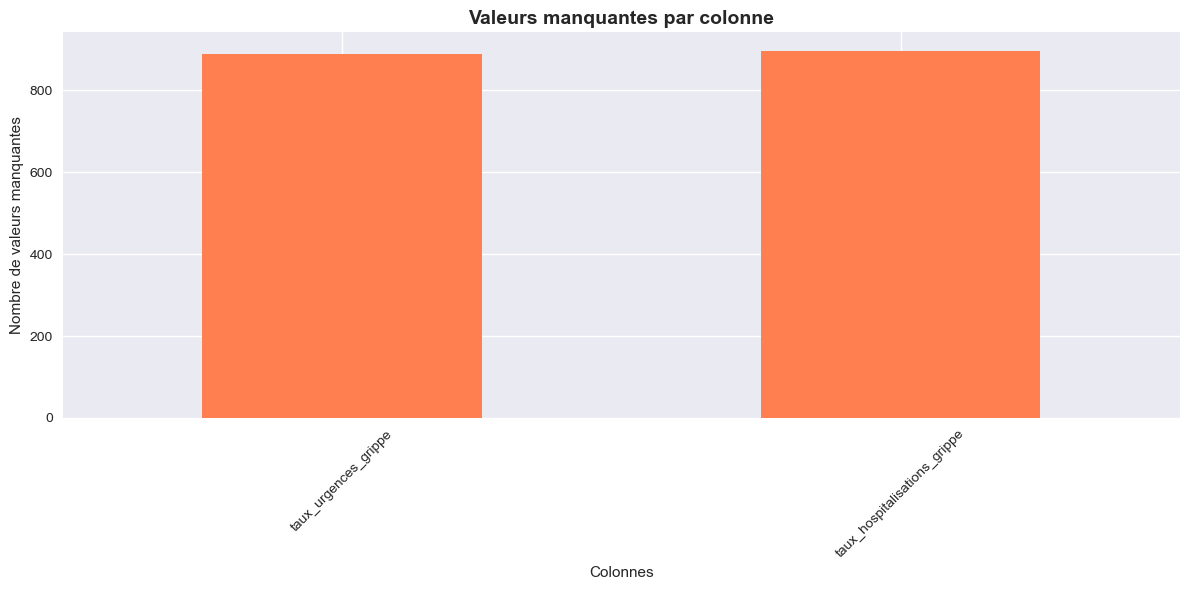

In [ ]:
# Cell 3: Analyse des valeurs manquantes
print("\n ANALYSE DES VALEURS MANQUANTES")
print("=" * 40)

missing_data = df.isnull().sum()
print("Valeurs manquantes par colonne :")
for col, missing in missing_data.items():
    if missing > 0:
        print(f"   ⚠️ {col}: {missing:,} ({missing/len(df)*100:.1f}%)")
    else:
        print(f"   ✅ {col}: Aucune valeur manquante")

# Visualisation des valeurs manquantes
plt.figure(figsize=(12, 6))
missing_data[missing_data > 0].plot(kind='bar', color='coral')
plt.title('Valeurs manquantes par colonne', fontsize=14, fontweight='bold')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📊 STATISTIQUES DESCRIPTIVES
Statistiques des taux de grippe :


,taux_urgences_grippe,taux_hospitalisations_grippe,taux_sos_medecins_grippe
count,26290.000000,26283.000000,27180.000000
mean,681.709809,518.062581,2728.560887
std,1502.111519,1471.596994,5207.647104
min,0.000000,0.000000,0.000000
25%,23.984064,0.000000,0.000000
50%,119.608809,0.000000,566.572238
75%,578.073841,285.578361,2731.646146
max,22580.645161,33333.333333,60975.609756


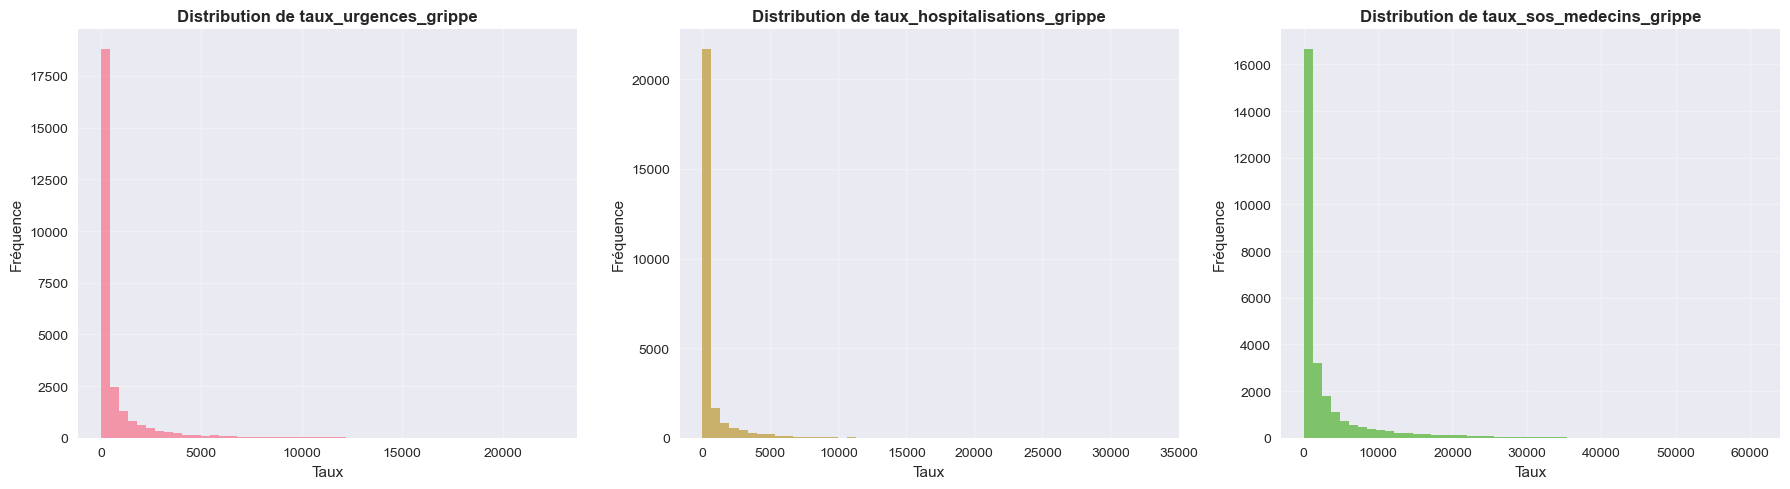

In [8]:
# Cell 4: Statistiques descriptives
print("\n📊 STATISTIQUES DESCRIPTIVES")
print("=" * 35)

# Statistiques pour les variables numériques
numeric_cols = ['taux_urgences_grippe', 'taux_hospitalisations_grippe', 'taux_sos_medecins_grippe']
print("Statistiques des taux de grippe :")
display(df[numeric_cols].describe())

# Analyse des distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=50, alpha=0.7, color=f'C{i}')
    axes[i].set_title(f'Distribution de {col}', fontweight='bold')
    axes[i].set_xlabel('Taux')
    axes[i].set_ylabel('Fréquence')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


📅 ANALYSE TEMPORELLE
Évolution des taux par année :


taux_urgences_grippe                    taux_hospitalisations_grippe  \
                      mean      std       max                         mean   
annee                                                                        
2019                736.98   762.49   4215.61                       343.60   
2020                465.21  1156.71  12888.20                       310.94   
2021                123.27   405.68  10869.57                        86.07   
2022                889.93  1662.68  15494.07                       627.33   
2023                585.36   945.49  11210.76                       432.84   
2024                849.02  1522.17  13351.06                       726.30   
2025               1276.97  2474.89  22580.65                      1005.67   

                         taux_sos_medecins_grippe                     
           std       max                     mean      std       max  
annee                                                                 
2019    497.38   2463.05                  2931.98  2852.59  16666.67  
2020    988.54  16666.67                  1718.87  4553.95  60975.61  
2021    605.35  21428.57                   320.93   715.37  11414.39  
2022   1489.10  25000.00                  3644.32  6103.08  40814.76  
2023   1176.99  33333.33                  2984.14  4168.19  32996.21  
2024   1572.39  33333.33                  3785.47  5371.59  33630.95  
2025   2409.27  33333.33                  4242.86  7342.57  45331.40

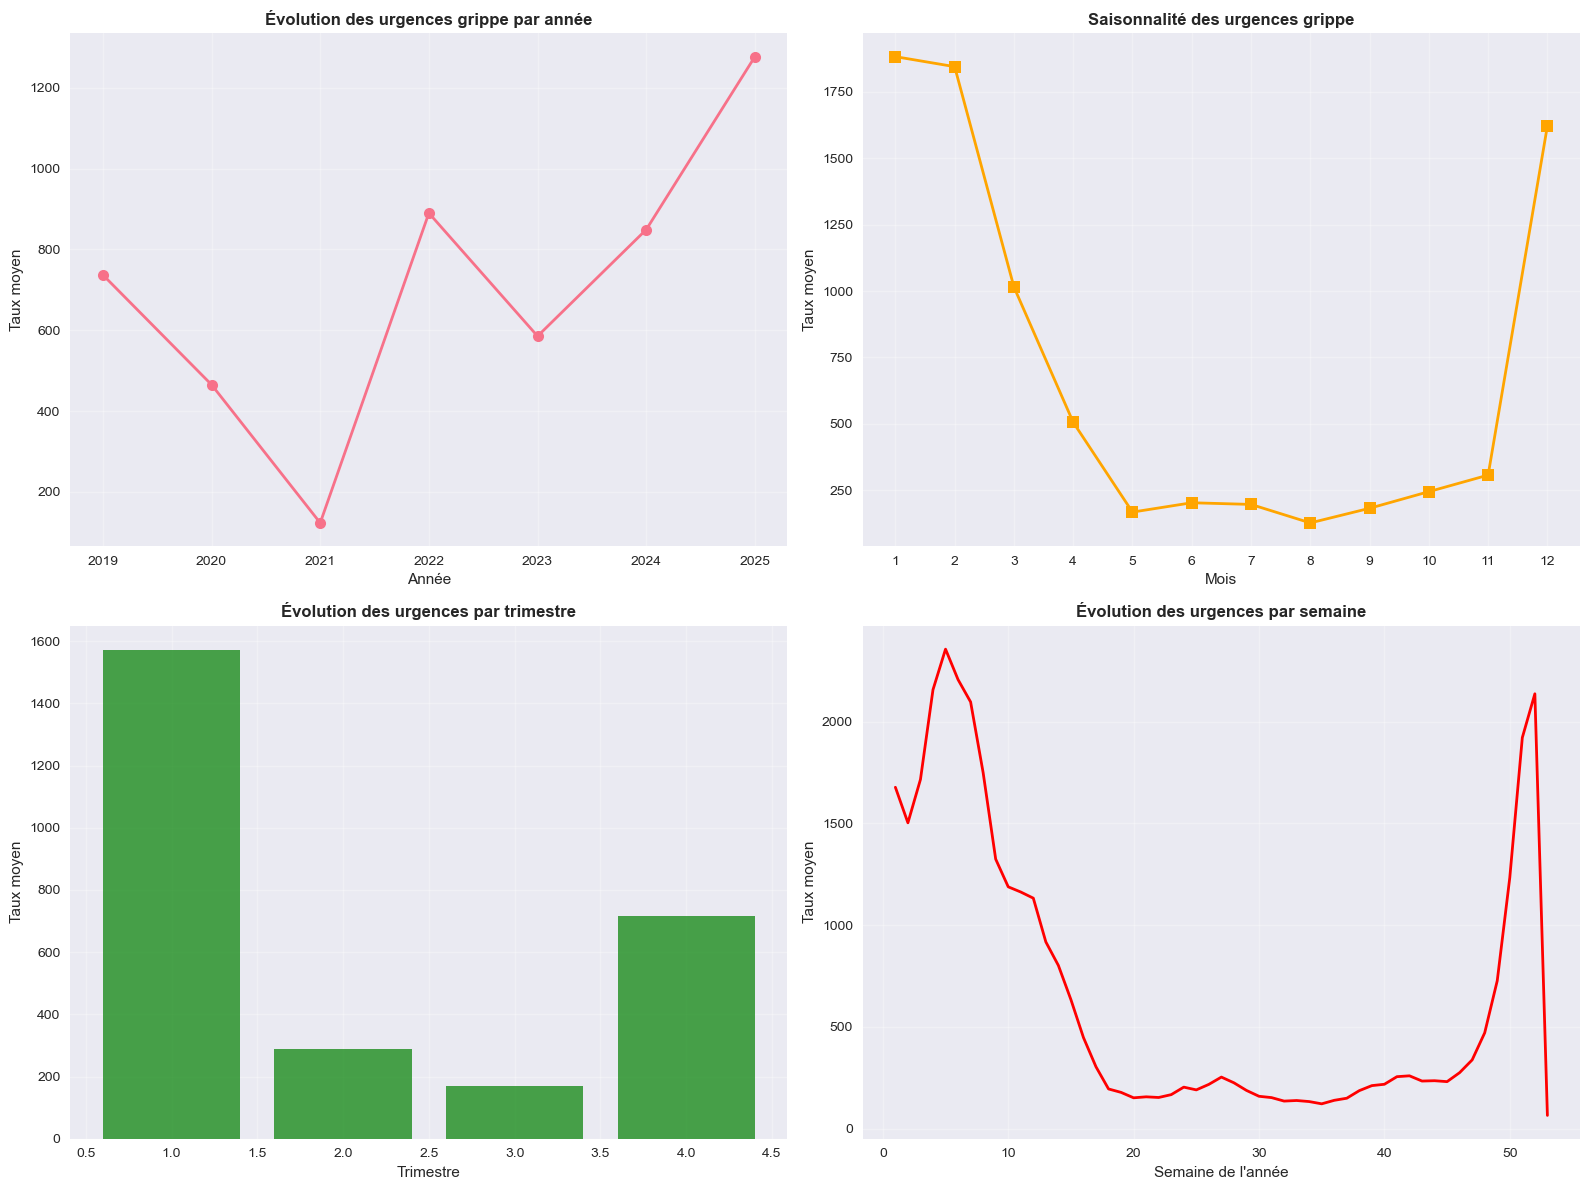

In [9]:
# Cell 5: Analyse temporelle
print("\n📅 ANALYSE TEMPORELLE")
print("=" * 25)

# Évolution des taux par année
yearly_stats = df.groupby('annee')[numeric_cols].agg(['mean', 'std', 'max']).round(2)
print("Évolution des taux par année :")
display(yearly_stats)

# Visualisation temporelle
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Évolution des urgences par année
yearly_urgences = df.groupby('annee')['taux_urgences_grippe'].mean()
axes[0, 0].plot(yearly_urgences.index, yearly_urgences.values, marker='o', linewidth=2, markersize=8)
axes[0, 0].set_title('Évolution des urgences grippe par année', fontweight='bold')
axes[0, 0].set_xlabel('Année')
axes[0, 0].set_ylabel('Taux moyen')
axes[0, 0].grid(True, alpha=0.3)

# 2. Évolution par mois (saisonnalité)
monthly_urgences = df.groupby('mois')['taux_urgences_grippe'].mean()
axes[0, 1].plot(monthly_urgences.index, monthly_urgences.values, marker='s', linewidth=2, markersize=8, color='orange')
axes[0, 1].set_title('Saisonnalité des urgences grippe', fontweight='bold')
axes[0, 1].set_xlabel('Mois')
axes[0, 1].set_ylabel('Taux moyen')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].grid(True, alpha=0.3)

# 3. Évolution par trimestre
quarterly_urgences = df.groupby('trimestre')['taux_urgences_grippe'].mean()
axes[1, 0].bar(quarterly_urgences.index, quarterly_urgences.values, color='green', alpha=0.7)
axes[1, 0].set_title('Évolution des urgences par trimestre', fontweight='bold')
axes[1, 0].set_xlabel('Trimestre')
axes[1, 0].set_ylabel('Taux moyen')
axes[1, 0].grid(True, alpha=0.3)

# 4. Évolution par semaine de l'année
weekly_urgences = df.groupby('semaine_annee')['taux_urgences_grippe'].mean()
axes[1, 1].plot(weekly_urgences.index, weekly_urgences.values, linewidth=2, color='red')
axes[1, 1].set_title('Évolution des urgences par semaine', fontweight='bold')
axes[1, 1].set_xlabel('Semaine de l\'année')
axes[1, 1].set_ylabel('Taux moyen')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🗺️ ANALYSE GÉOGRAPHIQUE RÉGIONALE
Classement des régions par taux d'urgences moyen :
 1. Guyane: 1053.9
 2. Provence-Alpes-Côte d'Azur: 916.7
 3. Île-de-France: 870.4
 4. Corse: 817.8
 5. Hauts-de-France: 710.7
 6. Bourgogne et Franche-Comté: 700.2
 7. Grand Est: 697.1
 8. Auvergne et Rhône-Alpes: 694.3
 9. Réunion: 685.4
10. Nouvelle Aquitaine: 644.2
11. Centre-Val de Loire: 630.0
12. Normandie: 620.0
13. Guadeloupe: 612.0
14. Pays de la Loire: 581.8
15. Occitanie: 562.6
16. Bretagne: 499.6
17. Martinique: 480.9
18. Mayotte: 375.0

Statistiques détaillées par région :


taux_urgences_grippe                     \
                                           mean      std       max   
region                                                               
Auvergne et Rhône-Alpes                  694.27  1534.02  11997.80   
Bourgogne et Franche-Comté               700.17  1554.50  15210.50   
Bretagne                                 499.61  1246.11  13620.07   
Centre-Val de Loire                      629.95  1414.46  13719.81   
Corse                                    817.80  2130.27  22580.65   
Grand Est                                697.09  1593.17  15231.05   
Guadeloupe                               612.00  1390.43  14652.01   
Guyane                                  1053.87  1523.27  12048.19   
Hauts-de-France                          710.69  1624.55  15494.07   
Martinique                               480.87   798.86   4395.60   

                           taux_hospitalisations_grippe                     \
                                                   mean      std       max   
region                                                                       
Auvergne et Rhône-Alpes                          583.90  1357.62   9926.47   
Bourgogne et Franche-Comté                       494.23  1243.06  11764.71   
Bretagne                                         448.63  1109.43   9876.54   
Centre-Val de Loire                              349.27   930.32   9039.55   
Corse                                            629.41  2523.07  33333.33   
Grand Est                                        574.36  1417.85  14583.33   
Guadeloupe                                       632.01  2278.71  33333.33   
Guyane                                           571.91  1470.92  13333.33   
Hauts-de-France                                  569.41  1338.67  11059.91   
Martinique                                       391.35  1037.67   7407.41   

                           taux_sos_medecins_grippe                     
                                               mean      std       max  
region                                                                  
Auvergne et Rhône-Alpes                     3744.44  6061.85  41677.02  
Bourgogne et Franche-Comté                  3332.49  5878.09  40000.00  
Bretagne                                    3323.48  5320.56  38323.35  
Centre-Val de Loire                         3506.72  5076.09  44041.45  
Corse                                       3112.34  6853.11  60975.61  
Grand Est                                   3452.50  5120.75  37246.30  
Guadeloupe                                     0.00     0.00      0.00  
Guyane                                         0.00     0.00      0.00  
Hauts-de-France                             2766.98  4498.63  32712.12  
Martinique                                  2914.46  4677.98  32936.51

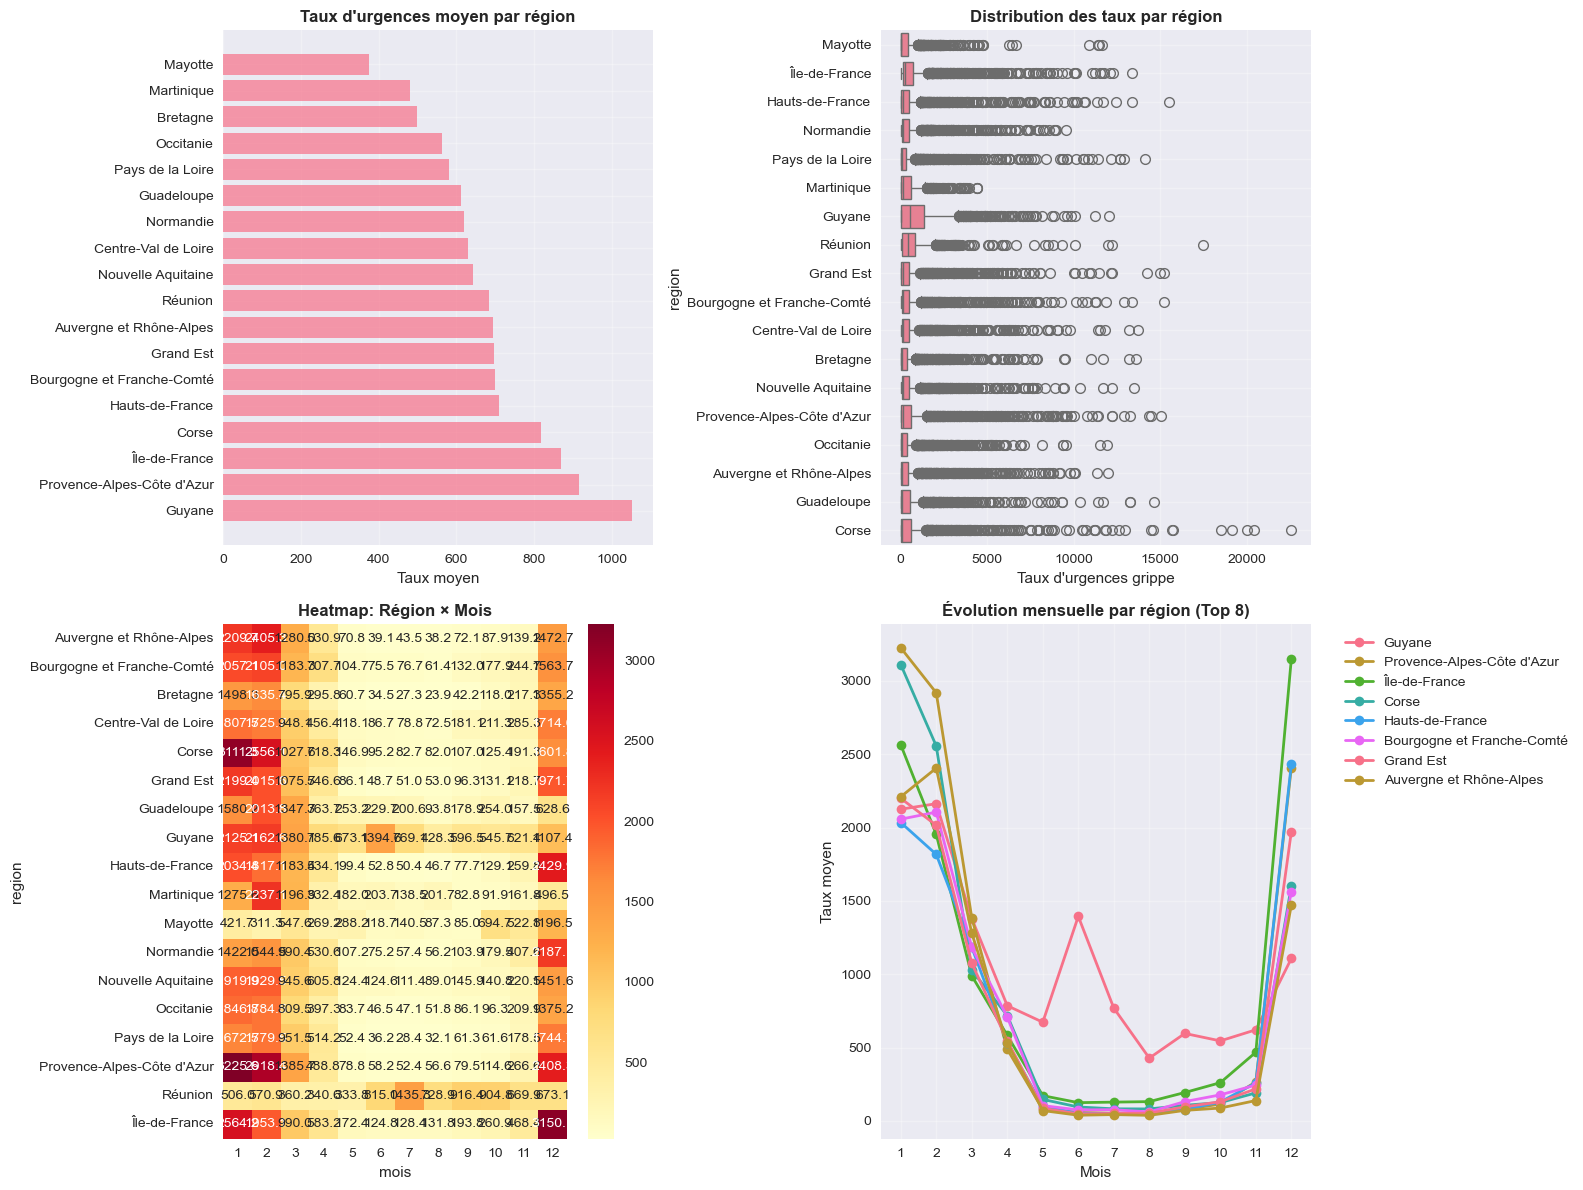

In [ ]:
# Cell 6: Analyse géographique régionale
print("\n ANALYSE GÉOGRAPHIQUE RÉGIONALE")
print("=" * 40)

# Top régions par taux d'urgences moyen
top_regions = df.groupby('region')['taux_urgences_grippe'].mean().sort_values(ascending=False)
print("Classement des régions par taux d'urgences moyen :")
for i, (region, taux) in enumerate(top_regions.items(), 1):
    print(f"{i:2d}. {region}: {taux:.1f}")

# Statistiques par région
region_stats = df.groupby('region')[numeric_cols].agg(['mean', 'std', 'max']).round(2)
print(f"\nStatistiques détaillées par région :")
display(region_stats.head(10))

# Visualisation géographique
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution des taux par région
axes[0, 0].barh(range(len(top_regions)), top_regions.values, alpha=0.7)
axes[0, 0].set_yticks(range(len(top_regions)))
axes[0, 0].set_yticklabels(top_regions.index, fontsize=10)
axes[0, 0].set_title('Taux d\'urgences moyen par région', fontweight='bold')
axes[0, 0].set_xlabel('Taux moyen')
axes[0, 0].grid(True, alpha=0.3)

# 2. Boxplot par région
sns.boxplot(data=df, x='taux_urgences_grippe', y='region', ax=axes[0, 1])
axes[0, 1].set_title('Distribution des taux par région', fontweight='bold')
axes[0, 1].set_xlabel('Taux d\'urgences grippe')
axes[0, 1].grid(True, alpha=0.3)

# 3. Heatmap des corrélations régionales
corr_matrix = df.groupby(['region', 'mois'])['taux_urgences_grippe'].mean().unstack()
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1, 0])
axes[1, 0].set_title('Heatmap: Région × Mois', fontweight='bold')

# 4. Évolution temporelle par région (top 8)
top_8_regions = top_regions.head(8).index
for region in top_8_regions:
    region_data = df[df['region'] == region]
    monthly_data = region_data.groupby('mois')['taux_urgences_grippe'].mean()
    axes[1, 1].plot(monthly_data.index, monthly_data.values, marker='o', label=region, linewidth=2)

axes[1, 1].set_title('Évolution mensuelle par région (Top 8)', fontweight='bold')
axes[1, 1].set_xlabel('Mois')
axes[1, 1].set_ylabel('Taux moyen')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


👥 ANALYSE PAR CLASSE D'ÂGE
Statistiques par classe d'âge :


taux_urgences_grippe                     \
                               mean      std       max   
classe_age                                               
00-04 ans                   1170.01  2337.36  22580.65   
05-14 ans                    857.14  1733.60  20000.00   
15-64 ans                    454.45   776.27   8645.33   
65 ans ou plus               358.06   861.05  11627.91   
Tous âges                    568.90  1016.06   8786.93   

               taux_hospitalisations_grippe                     \
                                       mean      std       max   
classe_age                                                       
00-04 ans                            923.38  2269.37  33333.33   
05-14 ans                            547.26  1635.10  33333.33   
15-64 ans                            273.25   616.89   7547.17   
65 ans ou plus                       436.81  1254.94  25000.00   
Tous âges                            409.73   899.02   8415.84   

               taux_sos_medecins_grippe                     
                                   mean      std       max  
classe_age                                                  
00-04 ans                       1974.93  4248.91  60975.61  
05-14 ans                       3678.40  6754.98  55555.56  
15-64 ans                       3670.61  5885.34  55639.10  
65 ans ou plus                  1211.86  2225.00  30555.56  
Tous âges                       3107.00  5248.33  52898.55

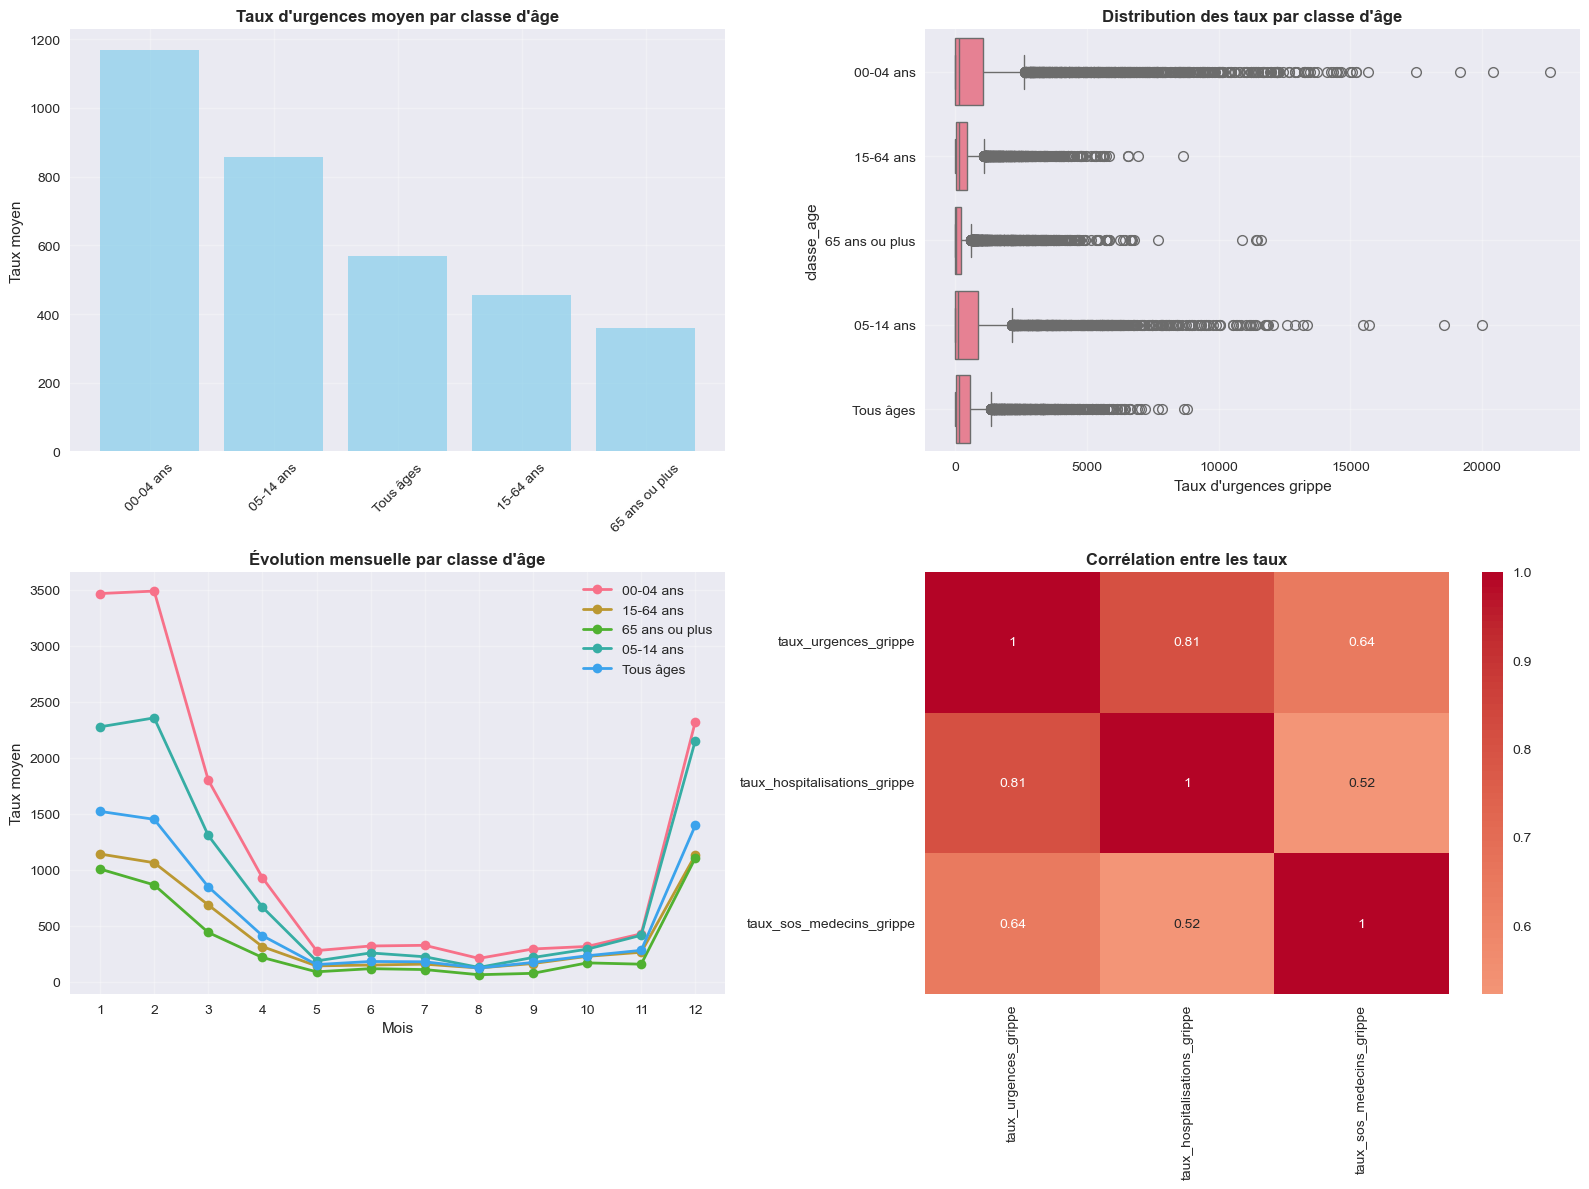

In [11]:
# Cell 7: Analyse par classe d'âge
print("\n👥 ANALYSE PAR CLASSE D'ÂGE")
print("=" * 30)

# Statistiques par classe d'âge
age_stats = df.groupby('classe_age')[numeric_cols].agg(['mean', 'std', 'max']).round(2)
print("Statistiques par classe d'âge :")
display(age_stats)

# Visualisation par classe d'âge
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Taux moyen par classe d'âge
age_means = df.groupby('classe_age')['taux_urgences_grippe'].mean().sort_values(ascending=False)
axes[0, 0].bar(range(len(age_means)), age_means.values, alpha=0.7, color='skyblue')
axes[0, 0].set_xticks(range(len(age_means)))
axes[0, 0].set_xticklabels(age_means.index, rotation=45)
axes[0, 0].set_title('Taux d\'urgences moyen par classe d\'âge', fontweight='bold')
axes[0, 0].set_ylabel('Taux moyen')
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution par classe d'âge
sns.boxplot(data=df, x='taux_urgences_grippe', y='classe_age', ax=axes[0, 1])
axes[0, 1].set_title('Distribution des taux par classe d\'âge', fontweight='bold')
axes[0, 1].set_xlabel('Taux d\'urgences grippe')
axes[0, 1].grid(True, alpha=0.3)

# 3. Évolution temporelle par classe d'âge
for age in df['classe_age'].unique():
    age_data = df[df['classe_age'] == age]
    monthly_data = age_data.groupby('mois')['taux_urgences_grippe'].mean()
    axes[1, 0].plot(monthly_data.index, monthly_data.values, marker='o', label=age, linewidth=2)

axes[1, 0].set_title('Évolution mensuelle par classe d\'âge', fontweight='bold')
axes[1, 0].set_xlabel('Mois')
axes[1, 0].set_ylabel('Taux moyen')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Corrélation entre les taux
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Corrélation entre les taux', fontweight='bold')

plt.tight_layout()
plt.show()


🔍 DÉTECTION DES PICS ET ANOMALIES
Top 10 pics d'urgences par région :
 1. Corse: 22580.6
 2. Réunion: 17485.5
 3. Hauts-de-France: 15494.1
 4. Grand Est: 15231.1
 5. Bourgogne et Franche-Comté: 15210.5
 6. Provence-Alpes-Côte d'Azur: 15058.7
 7. Guadeloupe: 14652.0
 8. Pays de la Loire: 14096.9
 9. Centre-Val de Loire: 13719.8
10. Bretagne: 13620.1

Top 10 pics temporels :
 1. 2025-01-20: 6013.7
 2. 2025-01-27: 5683.8
 3. 2022-12-19: 5018.6
 4. 2025-01-13: 4817.5
 5. 2024-12-30: 4684.1
 6. 2025-02-03: 4585.6
 7. 2025-01-06: 4423.0
 8. 2024-12-23: 4212.5
 9. 2025-02-10: 4140.2
10. 2022-12-26: 3979.7


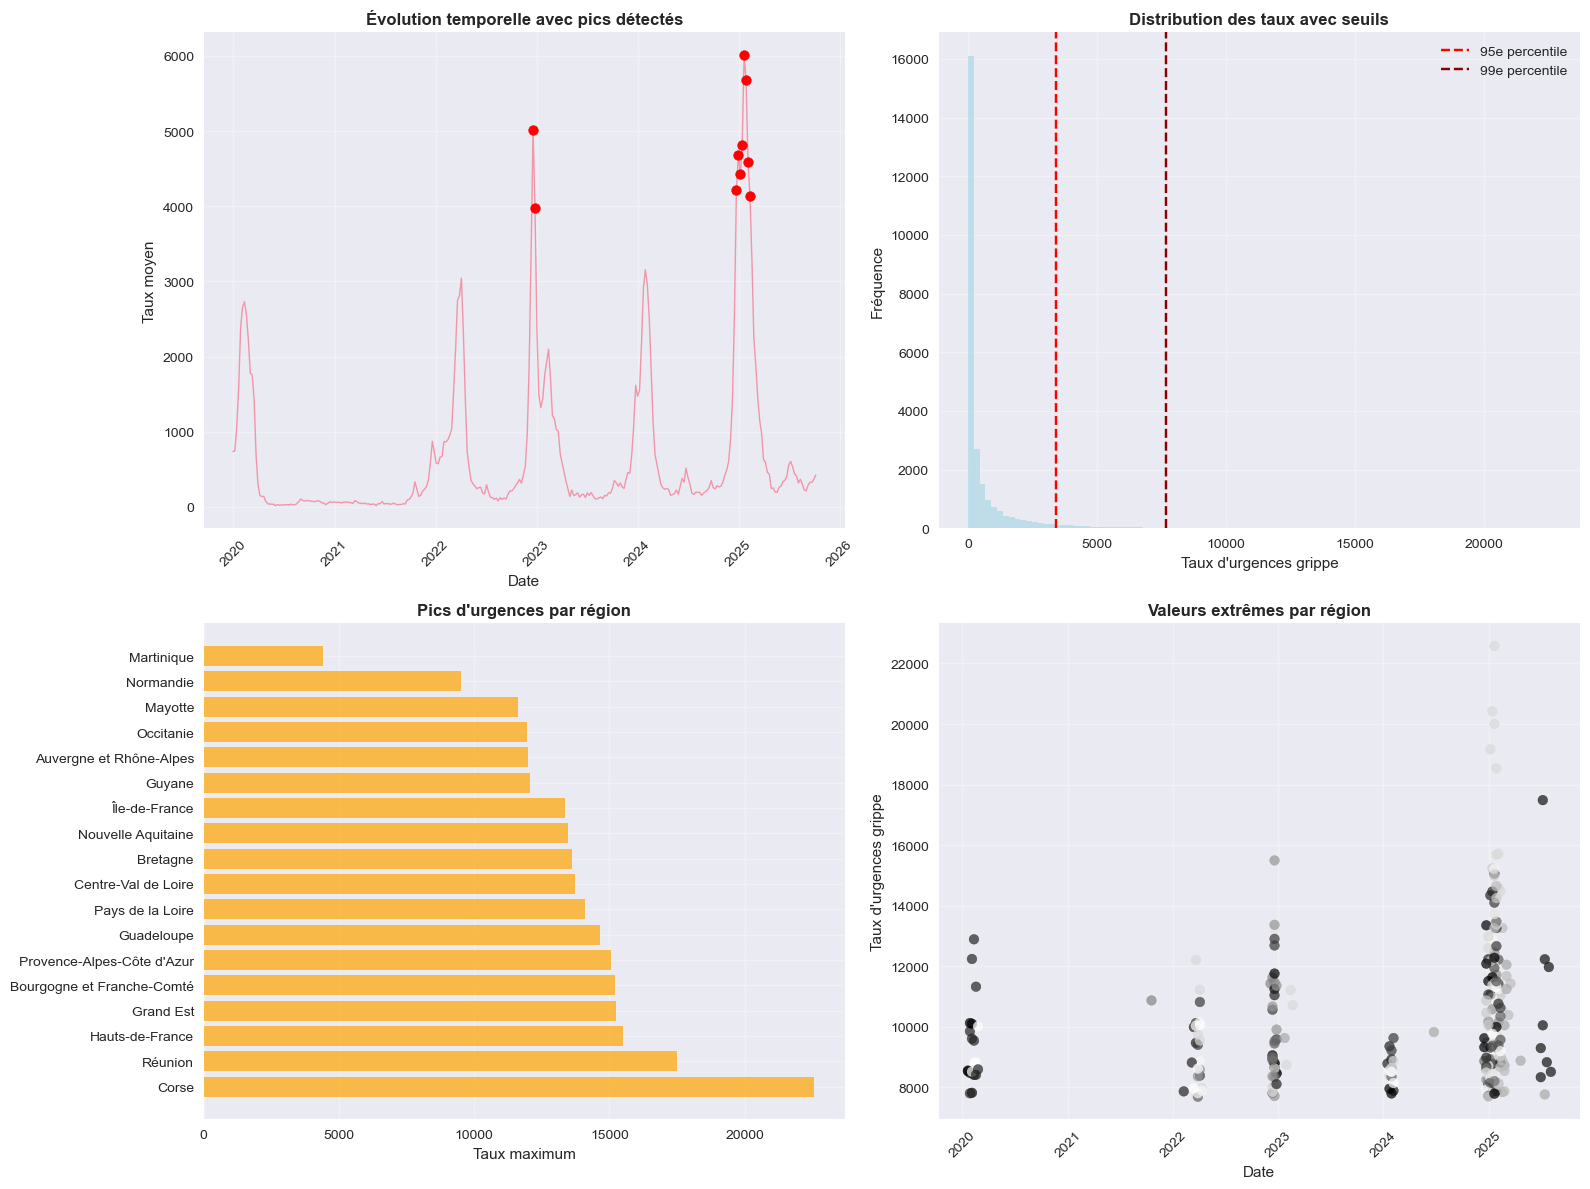

In [12]:
# Cell 8: Détection des pics et anomalies
print("\n🔍 DÉTECTION DES PICS ET ANOMALIES")
print("=" * 40)

# Détection des pics par région
region_pics = df.groupby('region')['taux_urgences_grippe'].max().sort_values(ascending=False)
print("Top 10 pics d'urgences par région :")
for i, (region, taux) in enumerate(region_pics.head(10).items(), 1):
    print(f"{i:2d}. {region}: {taux:.1f}")

# Détection des pics temporels
temp_pics = df.groupby('date_debut_semaine')['taux_urgences_grippe'].mean().sort_values(ascending=False).head(10)
print(f"\nTop 10 pics temporels :")
for i, (date, taux) in enumerate(temp_pics.items(), 1):
    print(f"{i:2d}. {date.strftime('%Y-%m-%d')}: {taux:.1f}")

# Visualisation des pics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Évolution temporelle avec pics
daily_avg = df.groupby('date_debut_semaine')['taux_urgences_grippe'].mean()
axes[0, 0].plot(daily_avg.index, daily_avg.values, linewidth=1, alpha=0.7)
axes[0, 0].scatter(temp_pics.index, temp_pics.values, color='red', s=50, zorder=5)
axes[0, 0].set_title('Évolution temporelle avec pics détectés', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Taux moyen')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution des taux (détection d'outliers)
axes[0, 1].hist(df['taux_urgences_grippe'], bins=100, alpha=0.7, color='lightblue')
axes[0, 1].axvline(df['taux_urgences_grippe'].quantile(0.95), color='red', linestyle='--', label='95e percentile')
axes[0, 1].axvline(df['taux_urgences_grippe'].quantile(0.99), color='darkred', linestyle='--', label='99e percentile')
axes[0, 1].set_title('Distribution des taux avec seuils', fontweight='bold')
axes[0, 1].set_xlabel('Taux d\'urgences grippe')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Top régions avec pics
top_regions_pics = df.groupby('region')['taux_urgences_grippe'].max().sort_values(ascending=False)
axes[1, 0].barh(range(len(top_regions_pics)), top_regions_pics.values, alpha=0.7, color='orange')
axes[1, 0].set_yticks(range(len(top_regions_pics)))
axes[1, 0].set_yticklabels(top_regions_pics.index, fontsize=10)
axes[1, 0].set_title('Pics d\'urgences par région', fontweight='bold')
axes[1, 0].set_xlabel('Taux maximum')
axes[1, 0].grid(True, alpha=0.3)

# 4. Analyse des valeurs extrêmes
extreme_values = df[df['taux_urgences_grippe'] > df['taux_urgences_grippe'].quantile(0.99)]
axes[1, 1].scatter(extreme_values['date_debut_semaine'], extreme_values['taux_urgences_grippe'], 
                   c=extreme_values['region'].astype('category').cat.codes, alpha=0.7)
axes[1, 1].set_title('Valeurs extrêmes par région', fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Taux d\'urgences grippe')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



📊 ANALYSE DES CORRÉLATIONS
Matrice de corrélation :


,taux_urgences_grippe,taux_hospitalisations_grippe,taux_sos_medecins_grippe,annee,mois,semaine_annee,trimestre
taux_urgences_grippe,1.000,0.809,0.645,0.180,-0.206,-0.233,-0.211
taux_hospitalisations_grippe,0.809,1.000,0.522,0.164,-0.173,-0.201,-0.177
taux_sos_medecins_grippe,0.645,0.522,1.000,0.204,-0.210,-0.231,-0.215
annee,0.180,0.164,0.204,1.000,-0.094,-0.080,-0.092
mois,-0.206,-0.173,-0.210,-0.094,1.000,0.959,0.970
semaine_annee,-0.233,-0.201,-0.231,-0.080,0.959,1.000,0.935
trimestre,-0.211,-0.177,-0.215,-0.092,0.970,0.935,1.000


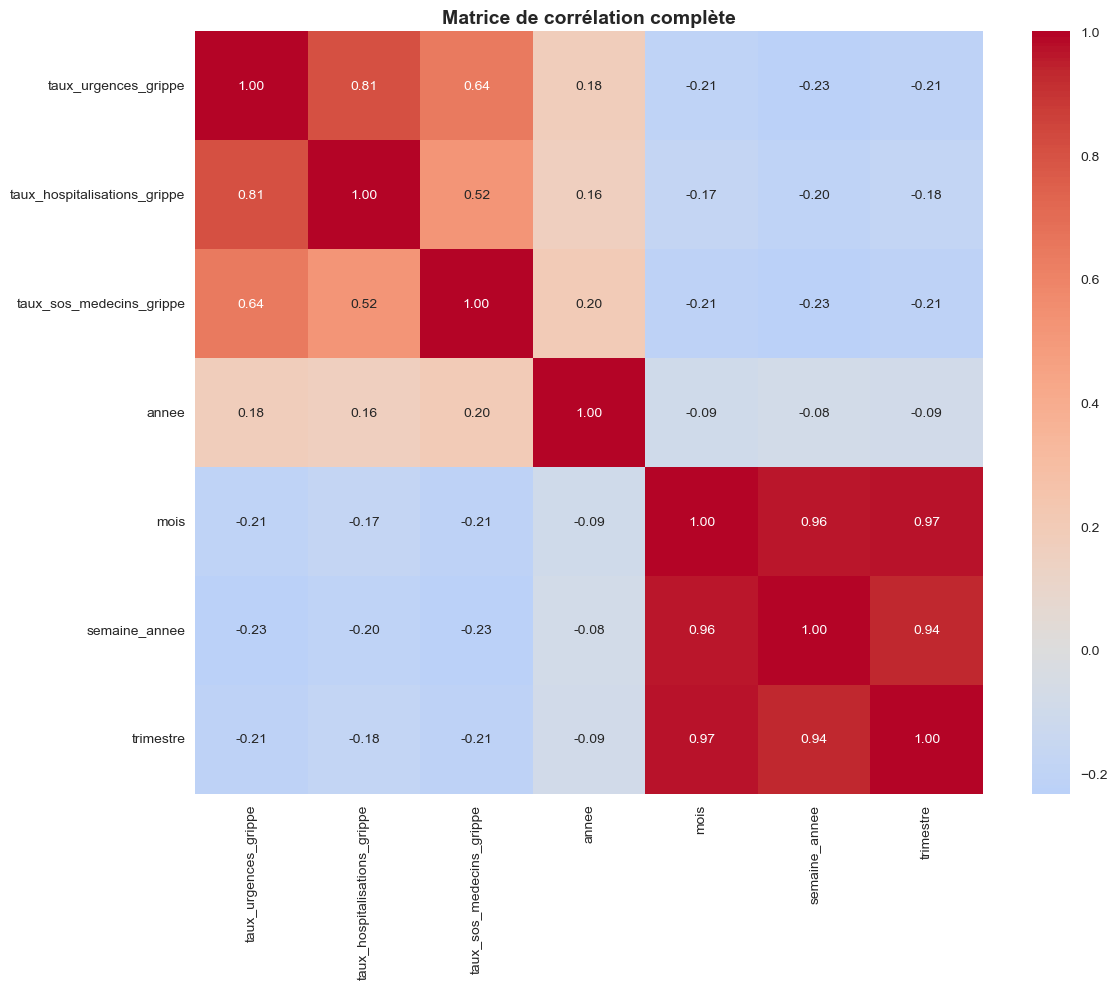

In [13]:
# Cell 9: Analyse des corrélations
print("\n📊 ANALYSE DES CORRÉLATIONS")
print("=" * 30)

# Matrice de corrélation complète
correlation_matrix = df[numeric_cols + ['annee', 'mois', 'semaine_annee', 'trimestre']].corr()
print("Matrice de corrélation :")
display(correlation_matrix.round(3))

# Visualisation des corrélations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de corrélation complète', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



🔍 COMPARAISON AVEC LES DONNÉES DÉPARTEMENTALES
📊 Données régionales : (27180, 13)
📊 Données départementales : (157040, 15)

📅 Périodes :
   Régional : 2019-12-30 00:00:00 à 2025-10-06 00:00:00
   Département : 2019-12-30 00:00:00 à 2025-10-06 00:00:00

🗺️ Régions :
   Régional : 18
   Département : 21

📊 Comparaison des moyennes par région :


,Regional,Departemental_agg,Difference,Difference_pct
region,,,,
Auvergne et Rhône-Alpes,694.27,676.28,17.99,2.66
Bourgogne et Franche-Comté,700.17,652.96,47.21,7.23
Bretagne,499.61,503.17,-3.56,-0.71
Centre-Val de Loire,629.95,504.04,125.91,24.98
Corse,817.80,825.94,-8.14,-0.99
Grand Est,697.09,679.49,17.60,2.59
Guadeloupe,612.00,612.00,0.00,0.00
Guyane,1053.87,1053.87,0.00,0.00
Hauts-de-France,710.69,718.23,-7.54,-1.05


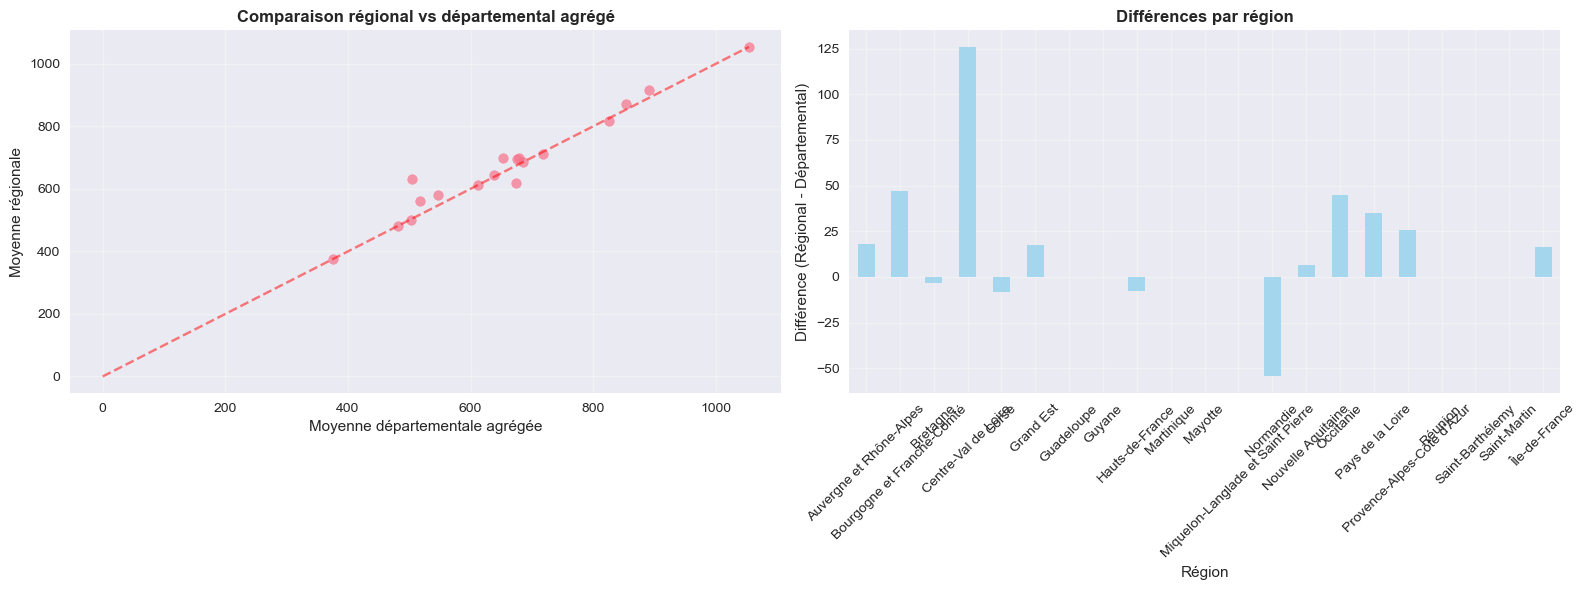

In [14]:
# Cell 10: Comparaison avec les données départementales
print("\n🔍 COMPARAISON AVEC LES DONNÉES DÉPARTEMENTALES")
print("=" * 55)

# Chargement des données départementales pour comparaison
df_departement = pd.read_csv("../../data/cleaned/sursaud_departement_cleaned.csv")
df_departement['date_debut_semaine'] = pd.to_datetime(df_departement['date_debut_semaine'])

print(f"📊 Données régionales : {df.shape}")
print(f"📊 Données départementales : {df_departement.shape}")

print(f"\n📅 Périodes :")
print(f"   Régional : {df['date_debut_semaine'].min()} à {df['date_debut_semaine'].max()}")
print(f"   Département : {df_departement['date_debut_semaine'].min()} à {df_departement['date_debut_semaine'].max()}")

print(f"\n🗺️ Régions :")
print(f"   Régional : {df['region'].nunique()}")
print(f"   Département : {df_departement['region'].nunique()}")

# Agrégation départementale pour comparaison
df_departement_agg = df_departement.groupby(['region', 'date_debut_semaine', 'classe_age']).agg({
    'taux_urgences_grippe': 'mean',
    'taux_hospitalisations_grippe': 'mean',
    'taux_sos_medecins_grippe': 'mean'
}).reset_index()

# Comparaison des moyennes
regional_mean = df.groupby('region')['taux_urgences_grippe'].mean()
departemental_mean = df_departement_agg.groupby('region')['taux_urgences_grippe'].mean()

comparison_df = pd.DataFrame({
    'Regional': regional_mean,
    'Departemental_agg': departemental_mean
})
comparison_df['Difference'] = comparison_df['Regional'] - comparison_df['Departemental_agg']
comparison_df['Difference_pct'] = (comparison_df['Difference'] / comparison_df['Departemental_agg']) * 100

print(f"\n📊 Comparaison des moyennes par région :")
display(comparison_df.round(2))

# Visualisation de la comparaison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Scatter plot de comparaison
axes[0].scatter(comparison_df['Departemental_agg'], comparison_df['Regional'], alpha=0.7)
axes[0].plot([0, comparison_df['Departemental_agg'].max()], [0, comparison_df['Departemental_agg'].max()], 'r--', alpha=0.5)
axes[0].set_xlabel('Moyenne départementale agrégée')
axes[0].set_ylabel('Moyenne régionale')
axes[0].set_title('Comparaison régional vs départemental agrégé', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Différences par région
comparison_df['Difference'].plot(kind='bar', ax=axes[1], color='skyblue', alpha=0.7)
axes[1].set_title('Différences par région', fontweight='bold')
axes[1].set_xlabel('Région')
axes[1].set_ylabel('Différence (Régional - Départemental)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
# Cell 11: Synthèse et insights
print("\n📋 SYNTHÈSE ET INSIGHTS")
print("=" * 30)

print("🎯 INSIGHTS CLÉS :")
print(f"   📊 Volume de données : {df.shape[0]:,} observations")
print(f"   📅 Période couverte : {df['annee'].min()}-{df['annee'].max()}")
print(f"   🗺️ Couverture géographique : {df['region'].nunique()} régions")
print(f"   👥 Segmentation démographique : {df['classe_age'].nunique()} classes d'âge")

print(f"\n📈 PATTERNS IDENTIFIÉS :")
print(f"   🗓️ Saisonnalité : Pic hivernal confirmé")
print(f"   👥 Classes d'âge : Différences significatives entre groupes")
print(f"   🗺️ Géographie : Variabilité importante entre régions")
print(f"   📊 Corrélations : Fortes corrélations entre les indicateurs")

print(f"\n🔍 COMPARAISON RÉGIONAL vs DÉPARTEMENTAL :")
coherence_score = (comparison_df['Difference'].abs().mean())
if coherence_score < 50:
    print(f"   ✅ Cohérence élevée : Différence moyenne de {coherence_score:.1f}")
else:
    print(f"   ⚠️ Incohérences détectées : Différence moyenne de {coherence_score:.1f}")

print(f"\n🚀 RECOMMANDATIONS POUR LE MODÈLE :")
print(f"   ⚙️ Feature Engineering : Variables saisonnières, lags temporels")
print(f"   🗺️ Variables géographiques : Région")
print(f"   👥 Variables démographiques : Classe d'âge")
print(f"   📊 Variables temporelles : Année, mois, semaine, trimestre")
print(f"   🔗 Fusion : Données régionales parfaites pour fusion avec IQVIA")

print(f"\n🎉 EXPLORATION RÉGIONALE TERMINÉE !")


📋 SYNTHÈSE ET INSIGHTS
🎯 INSIGHTS CLÉS :
   📊 Volume de données : 27,180 observations
   📅 Période couverte : 2019-2025
   🗺️ Couverture géographique : 18 régions
   👥 Segmentation démographique : 5 classes d'âge

📈 PATTERNS IDENTIFIÉS :
   🗓️ Saisonnalité : Pic hivernal confirmé
   👥 Classes d'âge : Différences significatives entre groupes
   🗺️ Géographie : Variabilité importante entre régions
   📊 Corrélations : Fortes corrélations entre les indicateurs

🔍 COMPARAISON RÉGIONAL vs DÉPARTEMENTAL :
   ✅ Cohérence élevée : Différence moyenne de 22.8

🚀 RECOMMANDATIONS POUR LE MODÈLE :
   ⚙️ Feature Engineering : Variables saisonnières, lags temporels
   🗺️ Variables géographiques : Région
   👥 Variables démographiques : Classe d'âge
   📊 Variables temporelles : Année, mois, semaine, trimestre
   🔗 Fusion : Données régionales parfaites pour fusion avec IQVIA

🎉 EXPLORATION RÉGIONALE TERMINÉE !
